In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from joblib import load

In [69]:
linear_regression = load('linear_regression.pkl')

In [7]:
ridge_regressor = load('ridge_regressor_model.pkl')
lasso_regressor = load('lasso_regressor_model.pkl')

In [99]:
rfr_1 = load('RandomForestregressor_1.pkl')
rfr_2 = load('RandomForestregressor_tuned1.pkl')
rfr_3 = load('RandomForestregressor_tuned2.pkl')

In [9]:
gbr = load('gradient_boosting.pkl')

In [10]:
lgbr_1 = load('light_gradient_boosting.pkl')
lgbr_2 = load('light_gradient_boosting_tuned1.pkl')

In [76]:
x = pd.read_csv("D:/Project/PowerPulse/Energy_consumption_predection/notebooks/x.csv")
y = pd.read_csv("D:/Project/PowerPulse/Energy_consumption_predection/notebooks/y.csv")

In [77]:
y = y.values.ravel()

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 1)

In [79]:
print(len(x_train), len(y_train))

1452681 1452681


In [80]:
print(len(x_test), len(y_test))  

622578 622578


In [16]:
def evaluate_model(model, x_train, y_train, x_test, y_test):

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    r2_train = metrics.r2_score(y_train, y_pred_train)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    RMSE_train = np.sqrt(MSE_train)
    RMSE_test = np.sqrt(MSE_test)

    return {
        'Train_r2': r2_train,
        'Test_r2': r2_test,
        'Train_MAE': MAE_train,
        'Test_MAE': MAE_test,
        'Train_MSE': MSE_train,
        'Test_MSE': MSE_test,
        'Train_RMSE': RMSE_train,
        'Test_RMSE': RMSE_test,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'model': model,
    }

In [17]:
models = [linear_regression, ridge_regressor, lasso_regressor, rfr_1, rfr_2, rfr_3, gbr, lgbr_1, lgbr_2] 
results = []

for i in models:
    result = evaluate_model(i, x_train, y_train, x_test, y_test)
    results.append(result)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value:

In [ ]:
#Visualization

In [ ]:
#Actual vs Predicted for Train & Test

In [94]:
model = ['linear_regression', 'ridge_regressor', 'lasso_regressor', 'rfr_1', 'rfr_2', 'rfr_3', 'gbr', 'lgbr_1', 'lgbr_2'] 

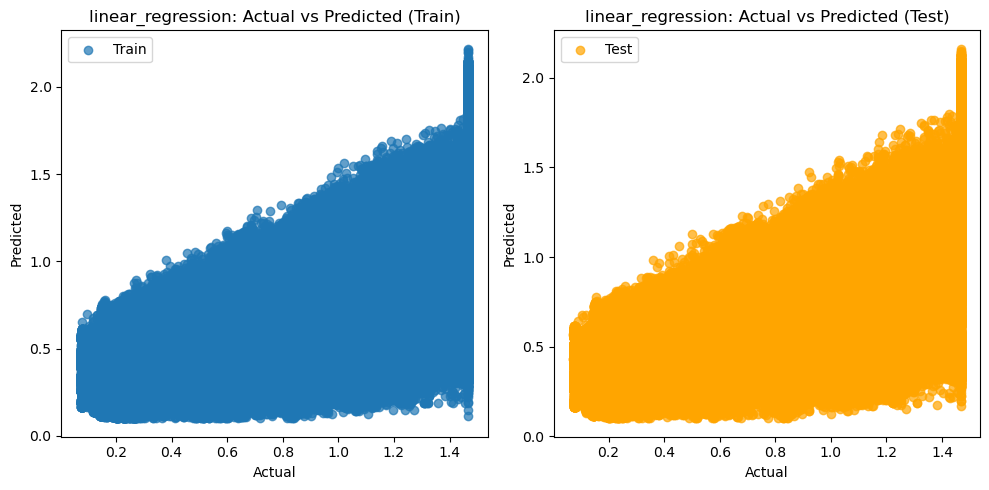

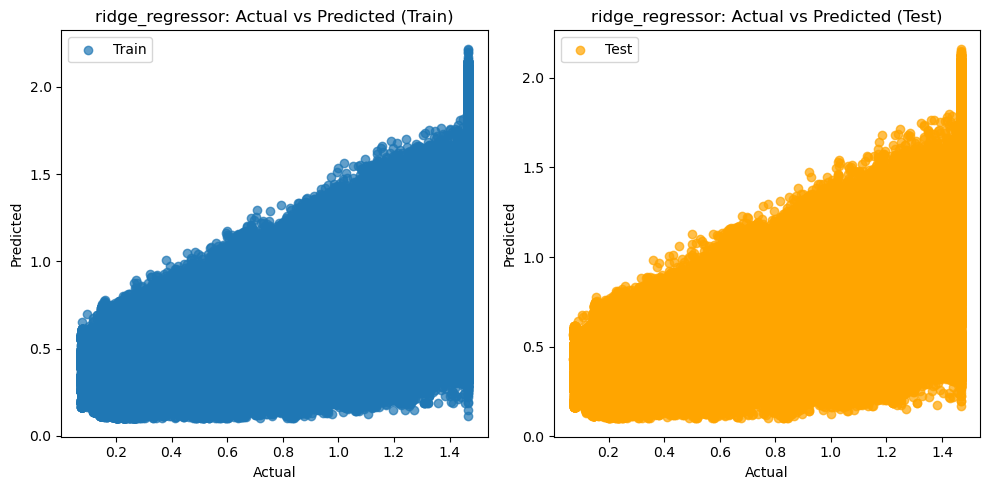

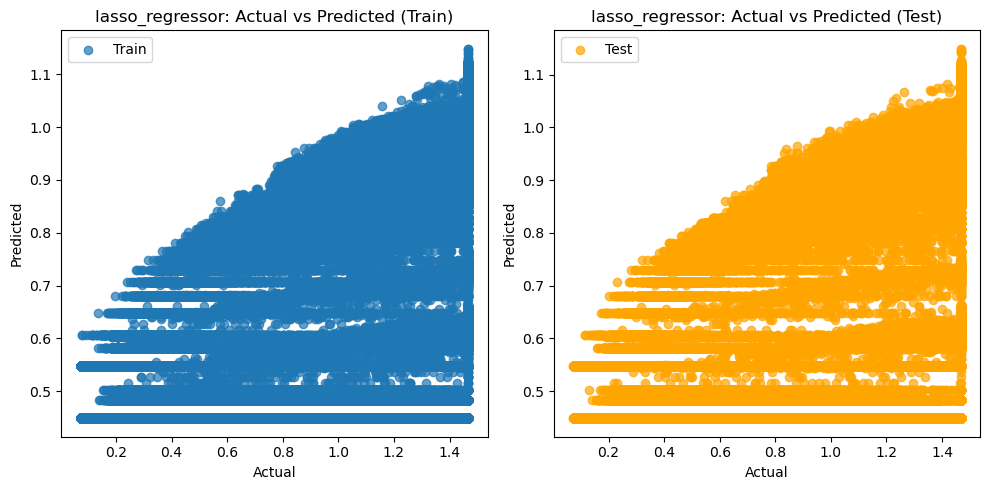

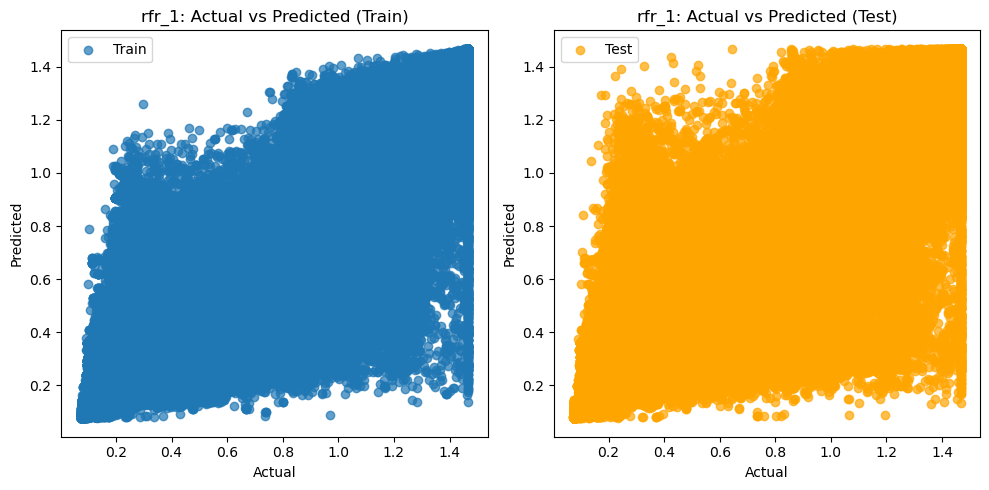

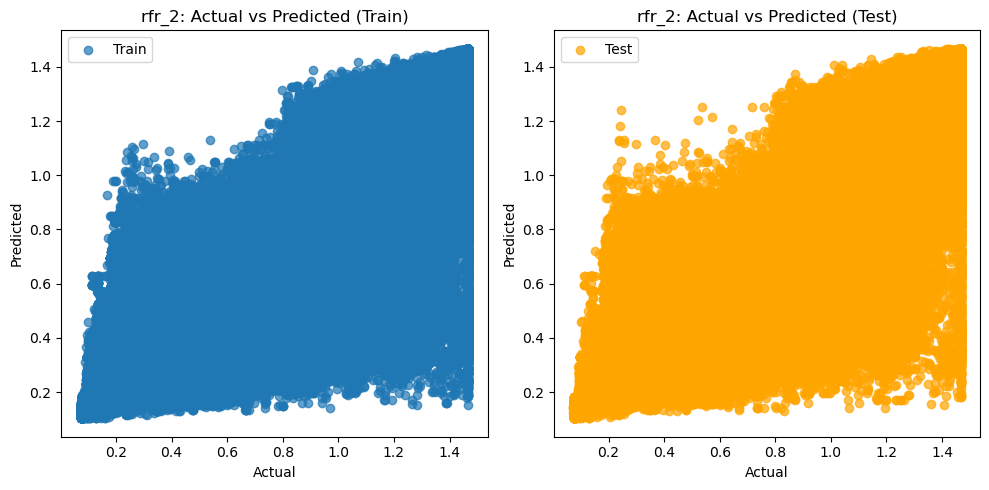

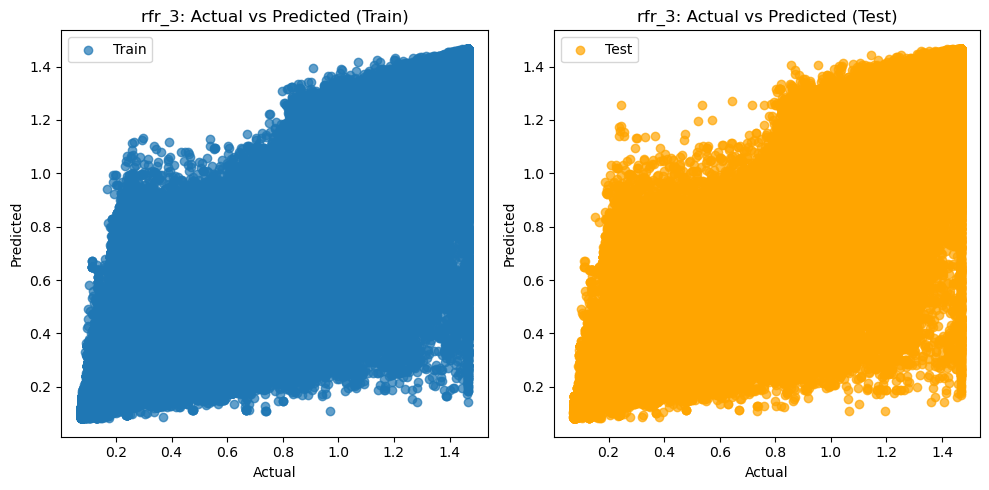

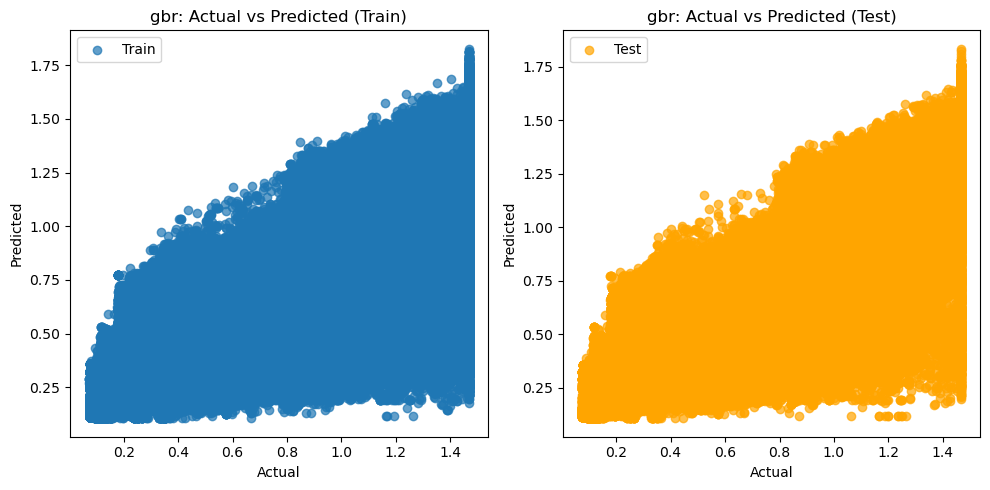

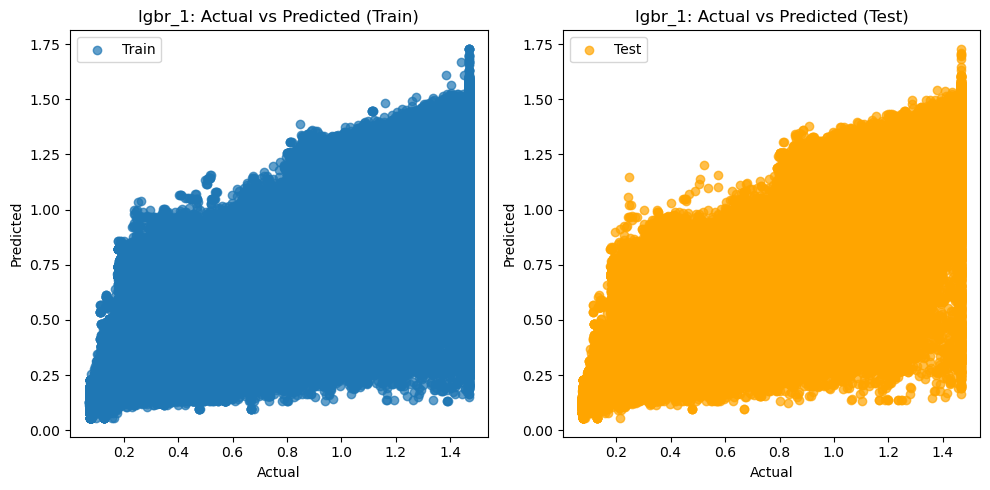

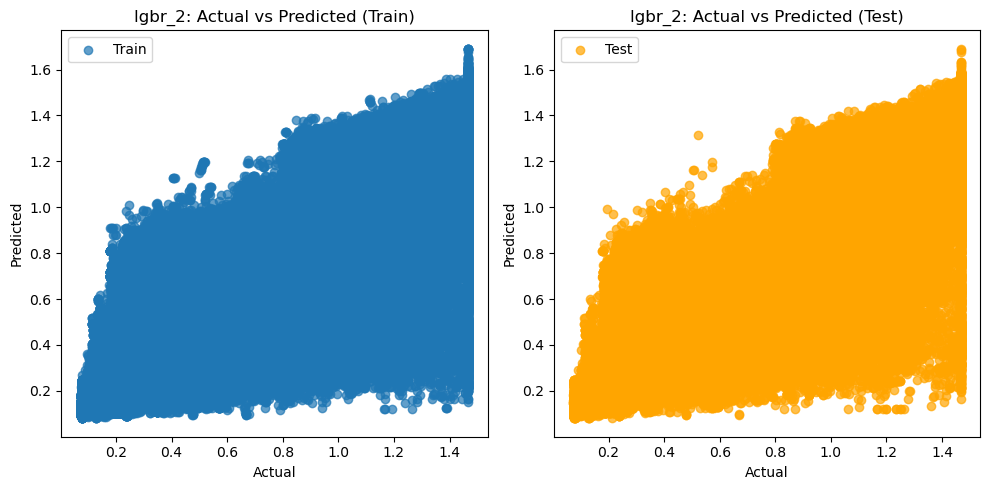

In [95]:
for i, result in enumerate(results):
    model_name = model[i]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    
     # Train
    axes[0].scatter(y_train, result['y_pred_train'], alpha=0.7, label='Train')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')
    axes[0].set_title(f'{model_name}: Actual vs Predicted (Train)')
    axes[0].legend()

    # Test
    axes[1].scatter(y_test, result['y_pred_test'], alpha=0.7, label='Test', color='orange')
    axes[1].set_xlabel('Actual')
    axes[1].set_ylabel('Predicted')
    axes[1].set_title(f'{model_name}: Actual vs Predicted (Test)')
    axes[1].legend()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f"results/actual_vs_predicted_{model_name}.png")  # Save the figure as PNG in the results folder  
    
    plt.show()

In [ ]:
#residual_plot

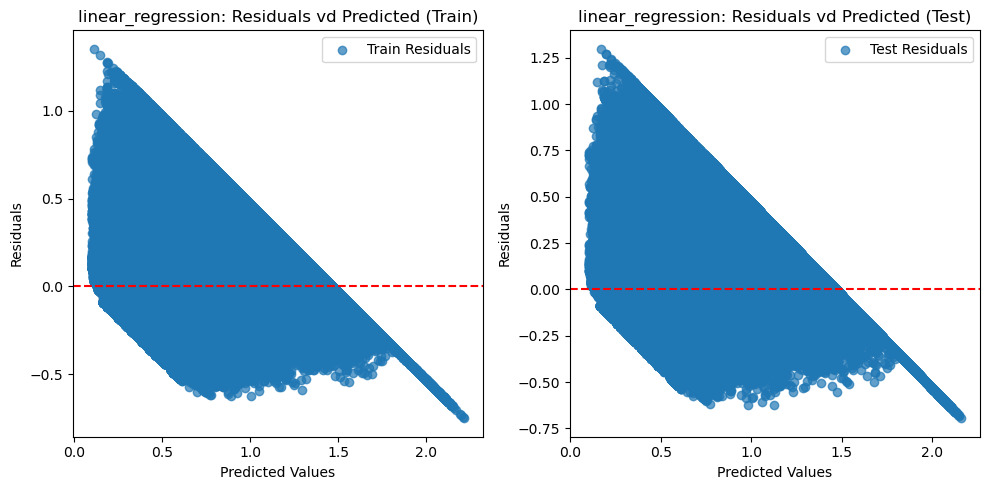

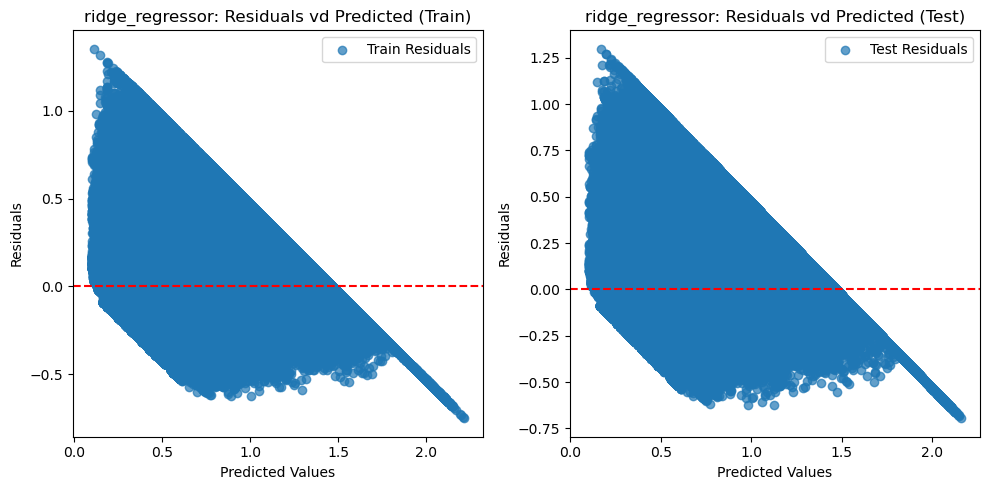

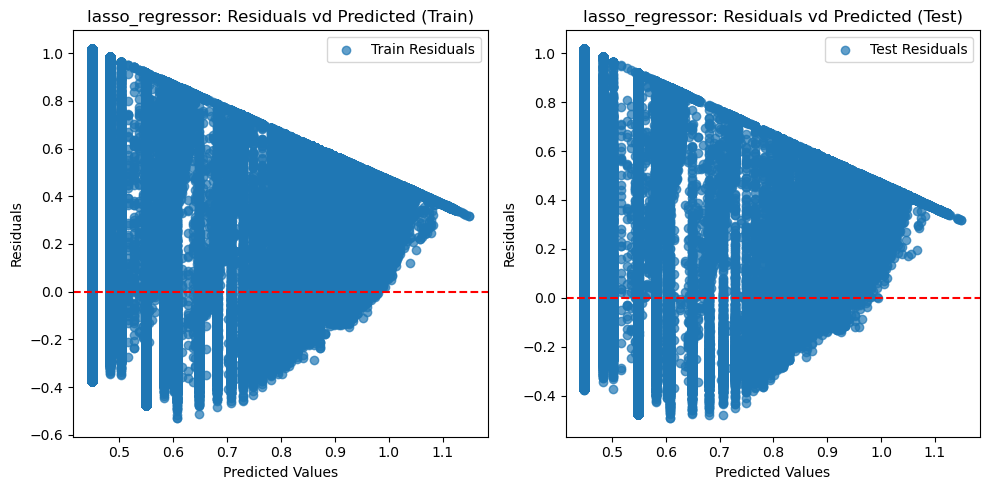

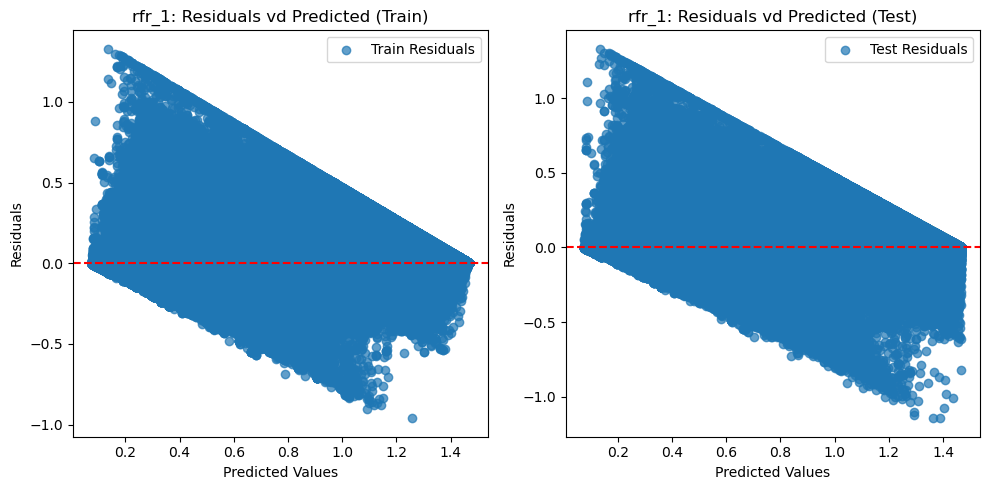

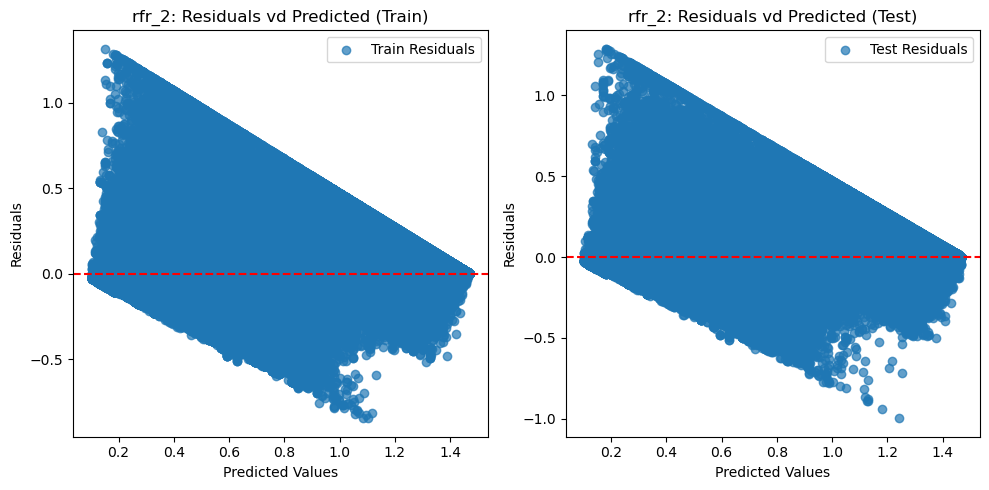

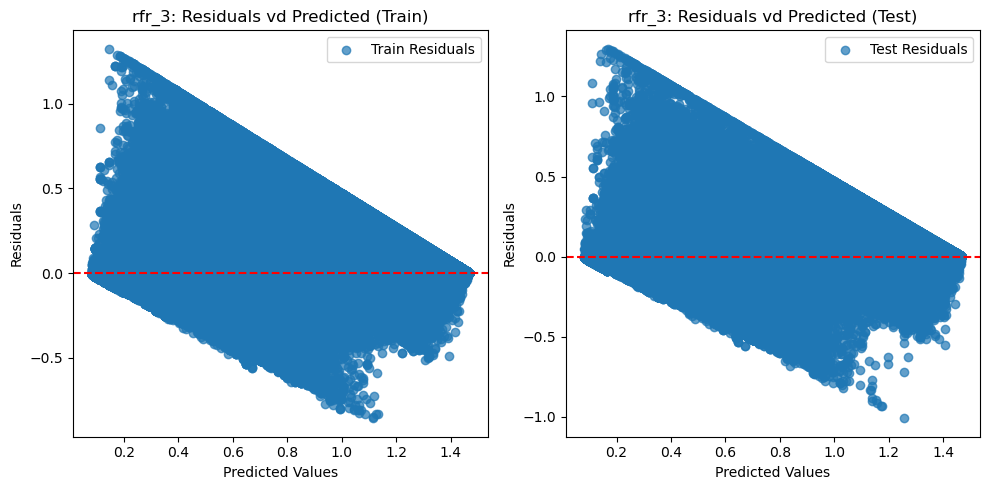

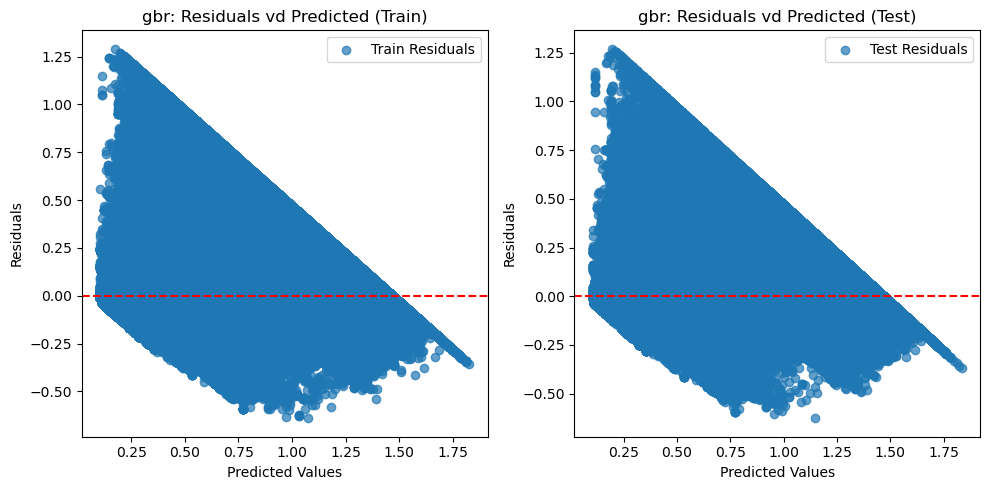

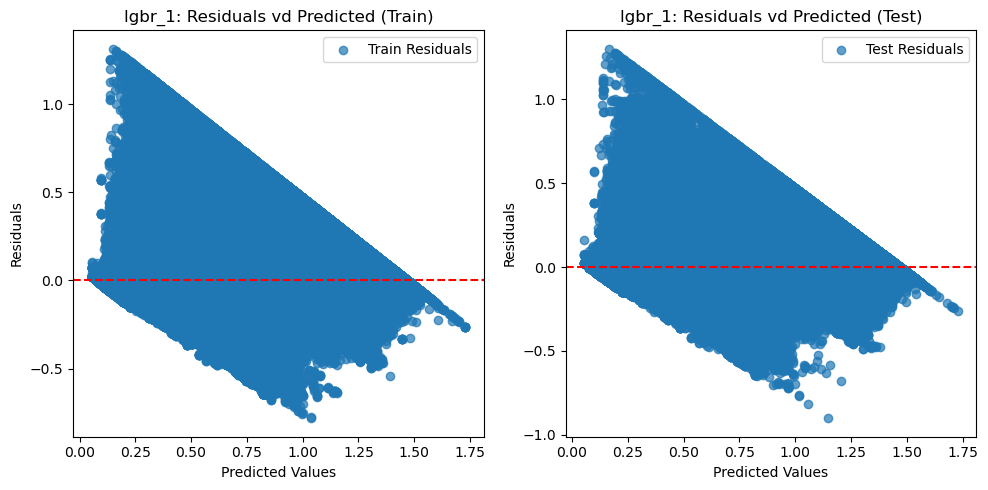

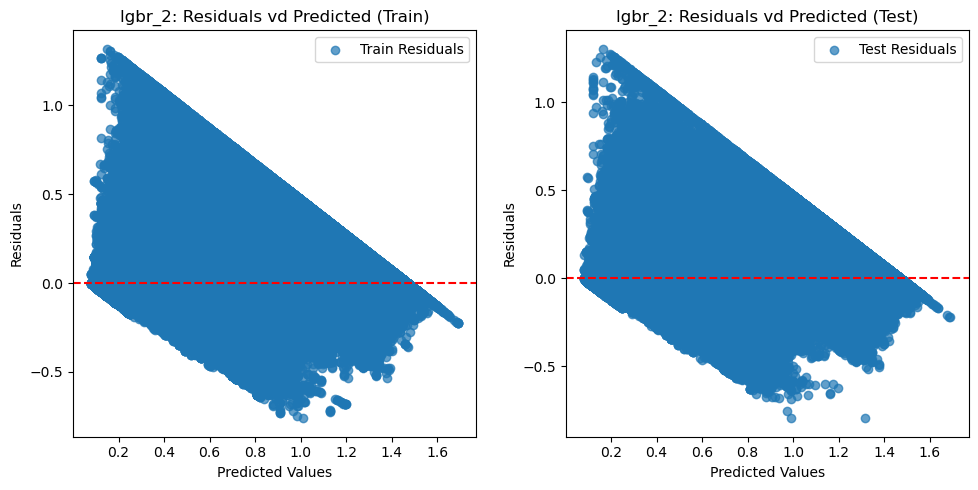

In [96]:
for i, result in enumerate(results):
    train_residuals = y_train - result['y_pred_train']
    test_residuals = y_test - result['y_pred_test']

    model_name = model[i]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # residuals for train set
    axes[0].scatter(result['y_pred_train'], train_residuals, alpha=0.7, label='Train Residuals')
    axes[0].axhline(0, color='red', linestyle='--')
    axes[0].set_xlabel('Predicted Values')
    axes[0].set_ylabel('Residuals')
    axes[0].set_title(f'{model_name}: Residuals vd Predicted (Train)')
    axes[0].legend()

    
    #residuals for test set
    axes[1].scatter(result['y_pred_test'], test_residuals, alpha=0.7, label='Test Residuals')
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel('Predicted Values')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title(f'{model_name}: Residuals vd Predicted (Test)')
    axes[1].legend()

    plt.tight_layout()
# Save the figure
    plt.savefig(f"results/residual_plot_{model_name}.png")  # Save the figure as PNG in the results folder  
    
    plt.show()  

In [ ]:
# feature Importance

In [90]:
def plot_feature_importance(model, model_name, feature_names):
    
    # Check if model has the feature_importances_ attribute
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        
        # Sort the feature importances in descending order
        indices = np.argsort(feature_importances)[::-1]

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(feature_importances)), feature_importances[indices], align='center')
        plt.yticks(range(len(feature_importances)), np.array(feature_names)[indices])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance')
        plt.savefig(f"results/Feature_Importance_{model_name}.png") 
        plt.show()
    else:
        print("The model does not have feature_importances_ attribute.")


In [91]:
treebased_models = [rfr_1, rfr_2, rfr_3, gbr, lgbr_1, lgbr_2] 

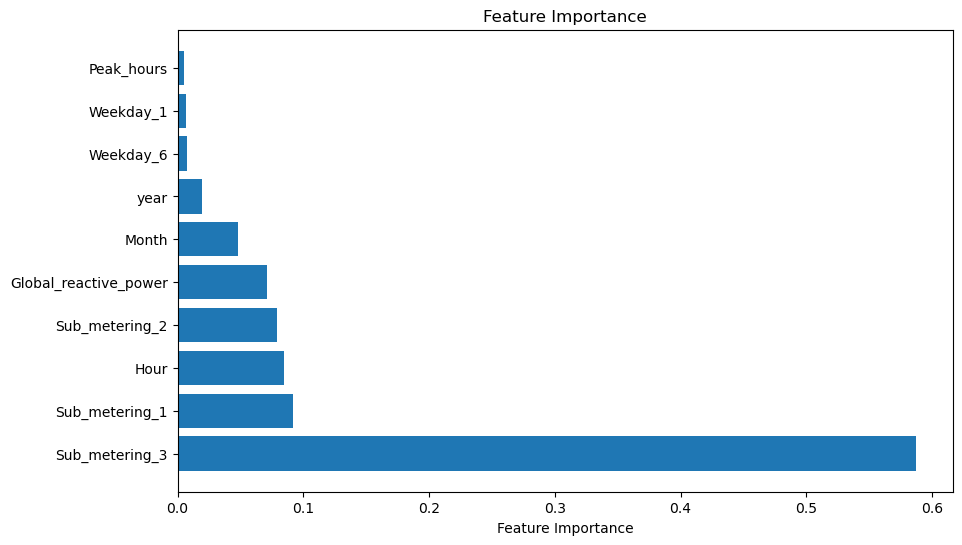

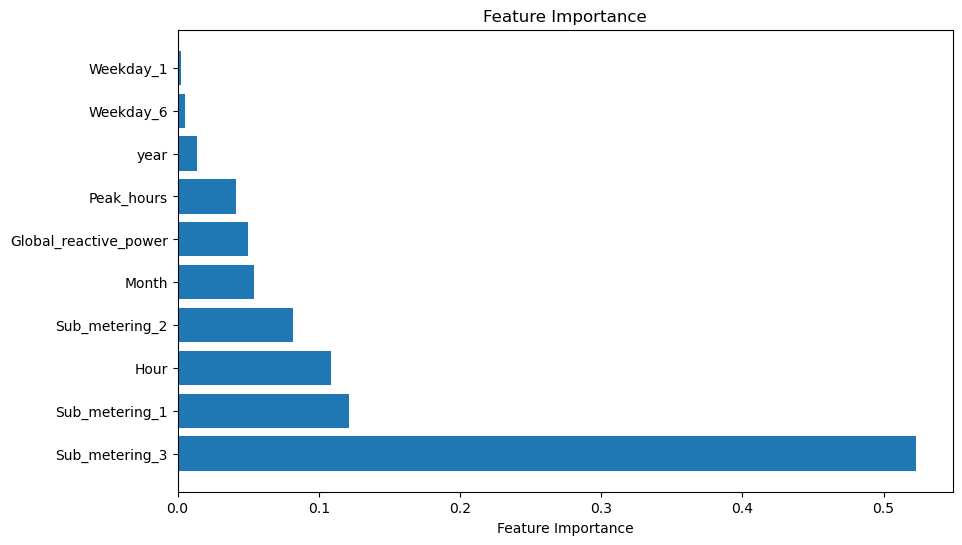

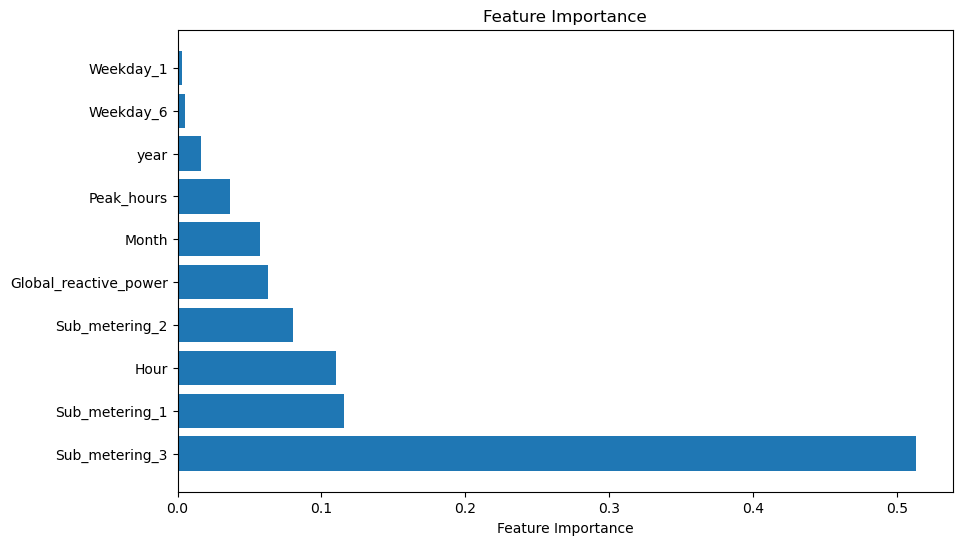

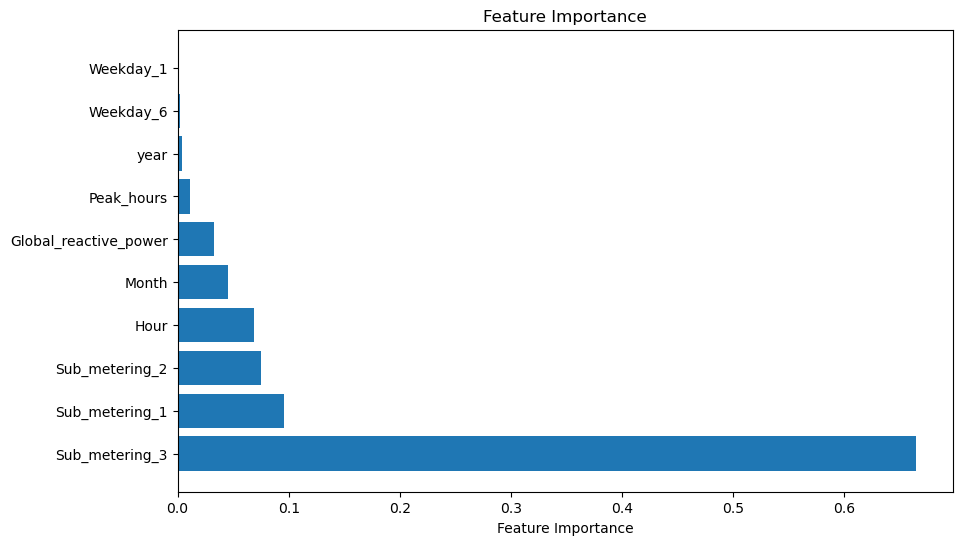

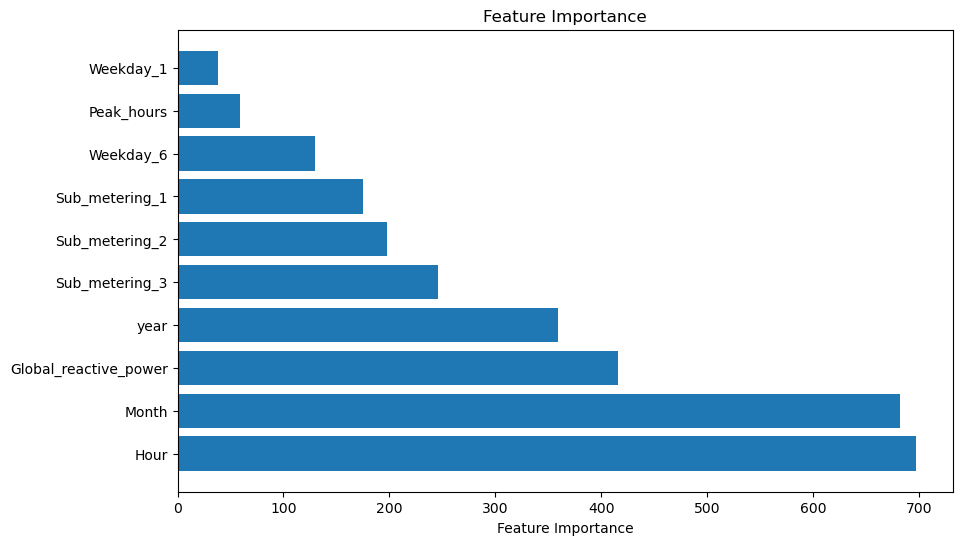

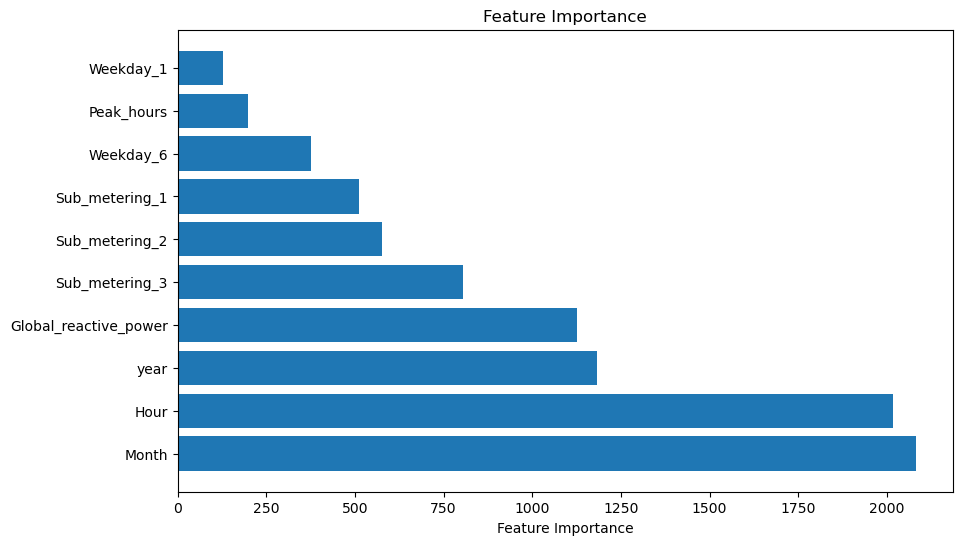

In [93]:
model_names = ['rfr_1', 'rfr_2', 'rfr_3', 'gbr', 'lgbr_1', 'lgbr_2'] 
for model, model_name in zip(treebased_models, model_names):
    plot_feature_importance(model, model_name, x_train.columns)

In [ ]:
# final Selected Model

In [ ]:
#rfr_1 (randomforestregressor)

In [ ]:
final_model = rfr_1
y_pred_train = final_model.predict(x_train)
y_pred_test_final = final_model.predict(x_test)
r2_train_final = metrics.r2_score(y_train, y_pred_train)
r2_test_final = metrics.r2_score(y_test, y_pred_test_final)
MAE_train_final = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test_final = metrics.mean_absolute_error(y_test, y_pred_test_final)
MSE_train_final = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test_final = metrics.mean_squared_error(y_test, y_pred_test_final)
RMSE_train_final = np.sqrt(MSE_train_final)
RMSE_test_final = np.sqrt(MSE_test_final)

# Save final model metrics
final_metrics = {
    'Model': 'Final Model',
    'Train_r2': r2_train_final,
    'Test_r2': r2_test_final,
    'Train_MAE': MAE_train_final,
    'Test_MAE': MAE_test_final,
    'Train_MSE': MSE_train_final,
    'Test_MSE': MSE_test_final,
    'Train_RMSE': RMSE_train_final,
    'Test_RMSE': RMSE_test_final,
}
final_metrics_df = pd.DataFrame([final_metrics])
final_metrics_df.to_csv('final_model_metrics.csv', index=False)

# Save final model visualizations
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_final, alpha=0.5, label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.title("Final Model - Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.savefig(f"final_model_actual_vs_predicted.png") 
plt.close()
